For Public Works Violations dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import seaborn as sns

In [2]:
file_path = "./code_enforcement_violations.csv"
data = pd.read_csv(file_path)
data.head()

,case_no,ticket_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,CE737959,BAA1QM02,2024-02-03 17:14:00+00,Open,1,25,Improper storage trash: res,2,NaN,Union Park,...,3,2 UNION PK ST,NaN,BOSTON,MA,02118,139372,42.341980,-71.070151,"(42.34197953680218, -71.07015050989436)"
1,CE737958,LEHCWL02,2024-02-03 16:40:00+00,Open,1,25,Improper storage trash: res,46,NaN,Newton,...,9,447 SHAWMUT AV,C/O LAILA MAALOUF,BOSTON,MA,02118,102642,42.339440,-71.074631,"(42.3394395428274, -71.07463052618378)"
2,CE737957,DUVKL802,2024-02-03 16:15:00+00,Open,1,25,Improper storage trash: res,294,296,Columbus,...,4,296 COLUMBUS AV,NaN,BOSTON,MA,02116,163593,42.346545,-71.073958,"(42.346545424034154, -71.07395778109957)"
3,CE737956,2L5NDF16,2024-02-03 16:14:00+00,Open,3,100,Overfilling of barrel/dumpster,504,NaN,Dudley,...,8,520 DUDLEY ST,NaN,ROXBURY,MA,02119,226709,42.322790,-71.072701,"(42.322789542194485, -71.07270055853654)"
4,CE737954,SZSDFX08,2024-02-03 16:03:00+00,Open,9a,250,Illegal dumping < 1 cubic yd,58,NaN,Mozart,...,10,23 WINDSOR DR,NaN,FOXBORO,MA,02035,99205,42.320800,-71.104401,"(42.32079958526445, -71.10440063469422)"


### Q1 Are there certain landlords/ management companies that have repeated violations?

In [3]:
violation_counts = data['contact_addr1'].value_counts()

repeated_violations = violation_counts[violation_counts > 2]
repeated_violations.head(20)

74 CLARENDON ST SUITE A           2076
39 BRIGHTON AV                    1687
896 BEACON ST                     1555
330 ADAMS ST                      1503
ONE BEACON STREET 15TH FLOOR      1502
619 CENTRE ST                     1494
404 S HUNTINGTON AV                989
58 GAINSBOROUGH ST                 978
1616  CAMDEN  ROAD  SUITE #210     943
879 BEACON ST                      889
62 N BEACON ST                     862
85 CHARLES ST                      856
159 CAMBRIDGE ST                   853
660 CENTRE ST                      818
163 DORCHESTER AVE                 801
12 HANCOCK ST                      798
PO BOX 590099                      794
100 HALLET ST                      792
40 EVERETT ST                      779
39 BRIGHTON AVE                    771
Name: contact_addr1, dtype: int64

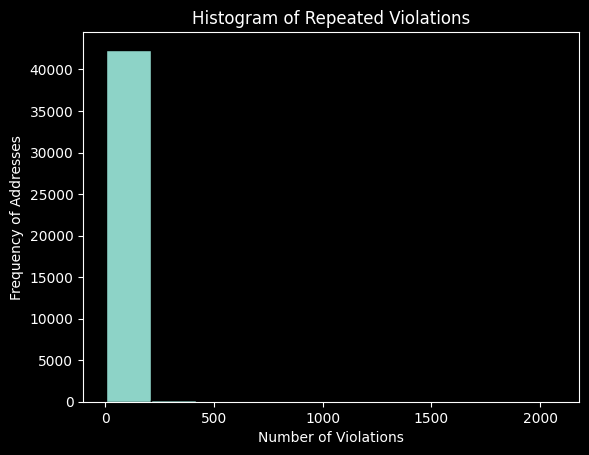

In [5]:
# Most of the bumber of violations are under 500 times
plt.hist(repeated_violations, bins=10, edgecolor='black')
plt.title('Histogram of Repeated Violations')
plt.xlabel('Number of Violations')
plt.ylabel('Frequency of Addresses')
plt.show()

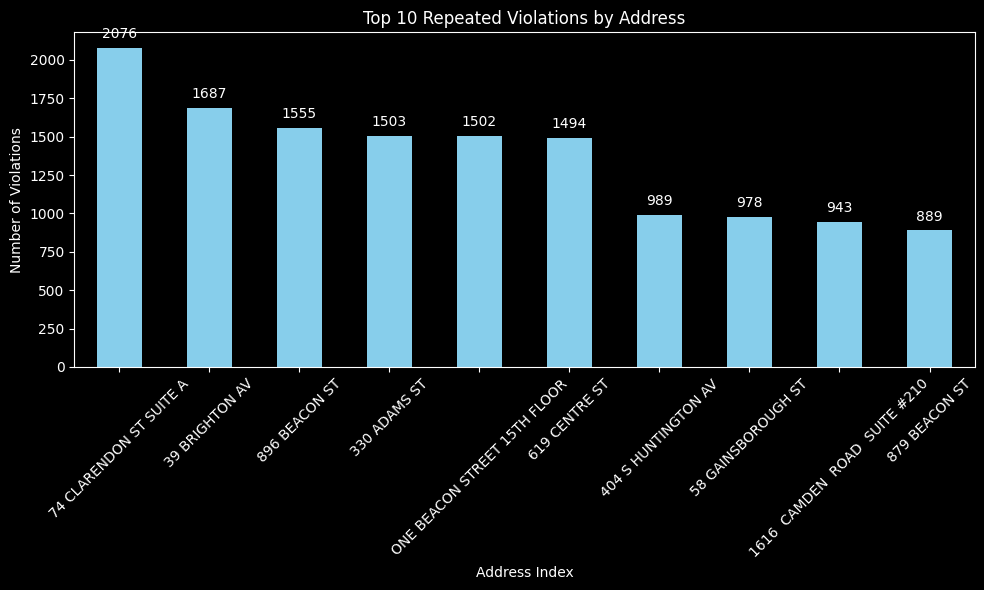

In [6]:
# 选择排名前10的违规次数
top_10_repeated_violations = repeated_violations.head(10)

# 绘制柱状图
fig, ax = plt.subplots(figsize=(10, 6))
top_10_repeated_violations.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Top 10 Repeated Violations by Address')
ax.set_xlabel('Address Index')
ax.set_ylabel('Number of Violations')

# 在每个柱子上标注数值
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

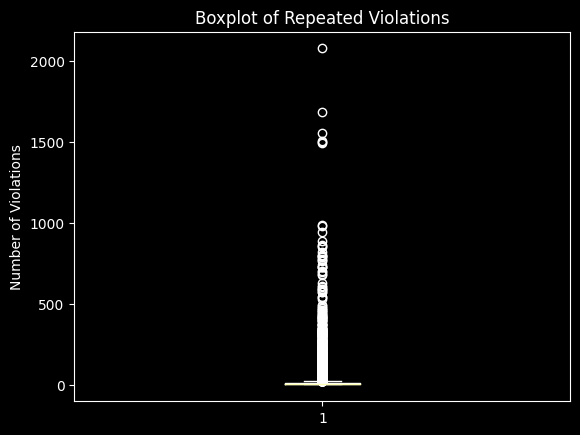

In [4]:
plt.boxplot(repeated_violations)
plt.title('Boxplot of Repeated Violations')
plt.ylabel('Number of Violations')
plt.show()

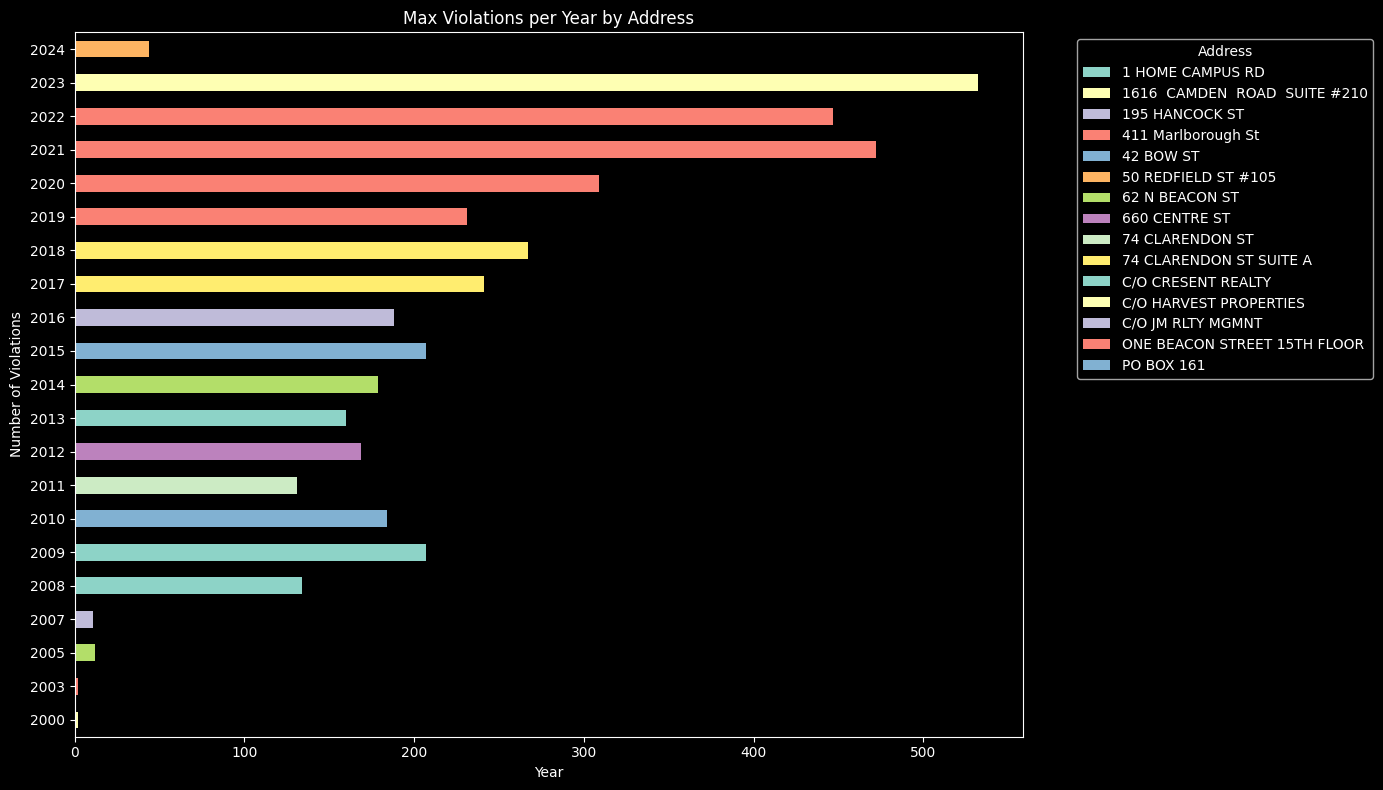

In [7]:

# 提取年份信息并创建新列
data['year'] = pd.to_datetime(data['status_dttm'], errors='coerce').dt.year

# 根据年份和地址（contact_addr1）分组，计算每年每个地址的违规次数
yearly_violations = data.groupby(['year', 'contact_addr1']).size().reset_index(name='counts')

# 找出每年违规次数最多的地址及其次数
max_violations_per_year = yearly_violations.loc[yearly_violations.groupby('year')['counts'].idxmax()]

# 对于绘图，确定每年最多违规的地址
max_violations_per_year_plot = max_violations_per_year.pivot(index='year', columns='contact_addr1', values='counts').fillna(0)

# 绘制每年违规最多的地址及其次数
max_violations_per_year_plot.plot(kind='barh', stacked=True, figsize=(14, 8))
plt.title('Max Violations per Year by Address')
plt.xlabel('Year')
plt.ylabel('Number of Violations')
plt.legend(title='Address', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Q3 What neighborhoods/ communities are affected most?

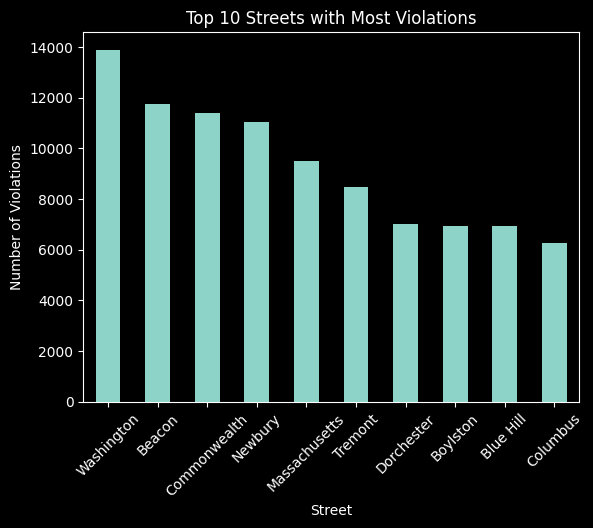

In [8]:
# Street
# 计算每个街道的违规案件数量
street_violation_counts = data['violation_street'].value_counts()

# 选择违规次数最多的前10个街道
top_streets = street_violation_counts.head(10)

# 绘制柱状图
top_streets.plot(kind='bar')
plt.title('Top 10 Streets with Most Violations')
plt.xlabel('Street')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.show()

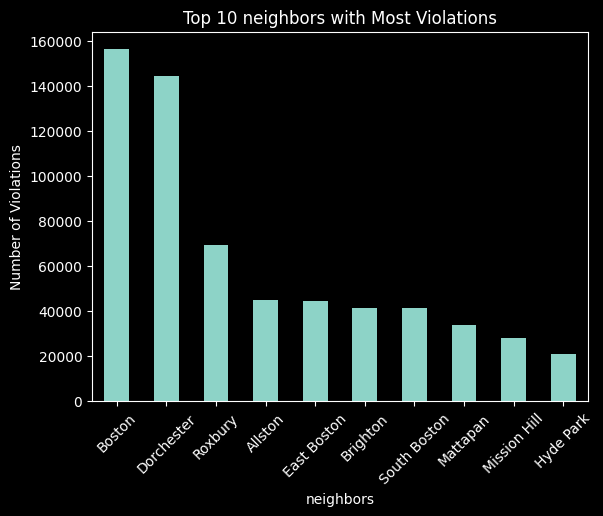

In [12]:
# Using violation_city, before zip transfering
# 计算每个街区的违规案件数量
street_violation_counts = data['violation_city'].value_counts()

# 选择违规次数最多的前10个街道
top_streets = street_violation_counts.head(10)

# 绘制柱状图
top_streets.plot(kind='bar')
plt.title('Top 10 neighbors with Most Violations')
plt.xlabel('neighbors')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.show()

In [20]:
def zip_to_neighbor(zippy):
    # some change
    if pd.isna(zippy):
        return "Not in Boston due to missing ZIP code"
    zippy = str(int(zippy)).strip()
    if not zippy.isdigit():
        return "Not in Boston"
    code = int(zippy)
    if code in [2134, 2163]:
        return "Allston"
    if code == 2135:
        return "Brighton"
    if code in [2108, 2116, 2117, 2123, 2133, 2199, 2216, 2217, 2295]:
        return "Back Bay/Beacon Hill"
    if (code >= 2101 and code <= 2107) or (code >= 2109 and code <= 2114) or code == 2196 or (code >= 2201 and code <= 2209) or code == 2211 or code == 2212 or code == 2222 or code == 2293:
        return "Central Boston"
    if code == 2129:
        return "Charlestown"
    if code in [2122, 2124, 2125]:
        return "Dorchester"
    if code in [2128, 2228]:
        return "East Boston"
    if code in [2115, 2215]:
        return "Fenway/Kenmore"
    if code == 2136:
        return "Hyde Park"
    if code == 2130:
        return "Jamaica Plain"
    if code == 2126:
        return "Mattapan"
    if code == 2131:
        return "Roslindale"
    if code in [2119, 2120, 2121]:
        return "Roxbury"
    if code in [2127, 2210]:
        return "South Boston"
    if code == 2118:
        return "South End"
    if code == 2132:
        return "West Roxbury"

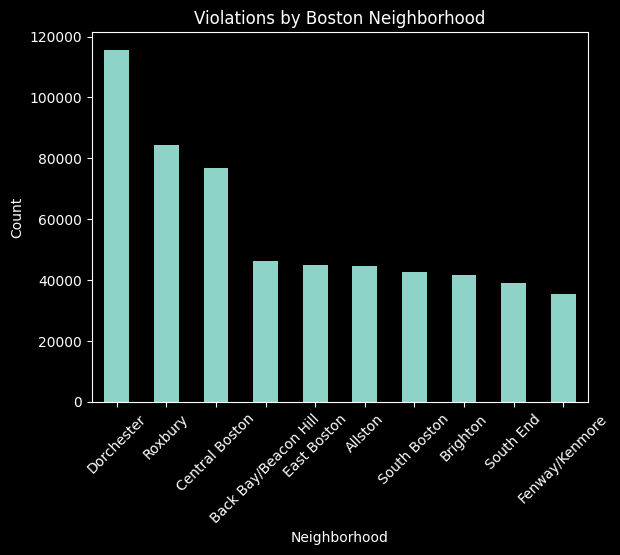

In [21]:
data['neighborhood'] = data['violation_zip'].apply(zip_to_neighbor)
neighborhood_counts = data['neighborhood'].value_counts().head(10)

neighborhood_counts.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Neighborhood')
plt.title('Violations by Boston Neighborhood')
plt.xticks(rotation=45)
plt.show()

### Q3.V2

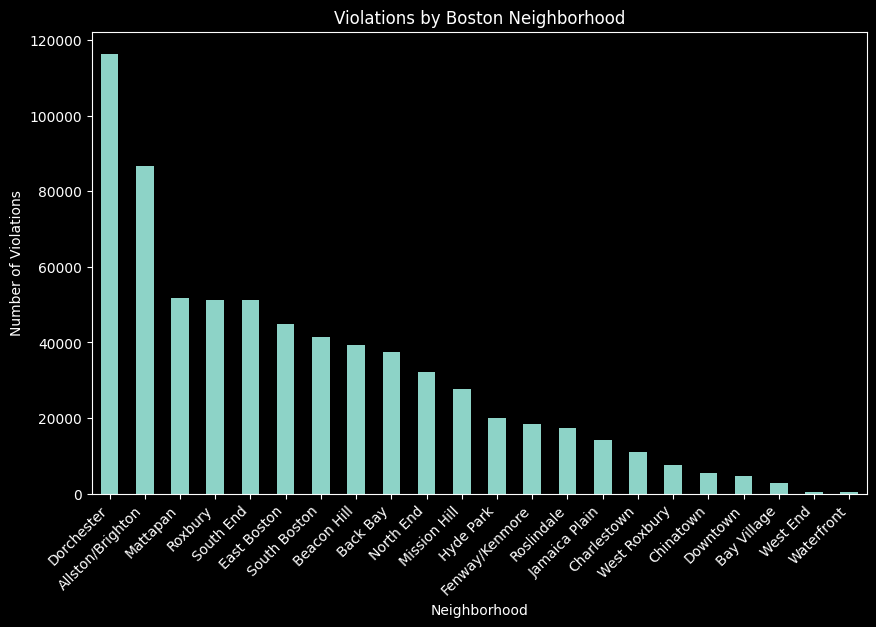

In [3]:
from test2 import checkNeighborhood,poly
neighborhoods = []
df = pd.read_csv('code_enforcement_violations.csv')
for index, row in df.iterrows():
    point = [row['latitude'], row['longitude']]
    neighborhood = checkNeighborhood(point, poly)
    neighborhoods.append(neighborhood)

# 将结果转换为DataFrame，以便更容易地进行分析和绘图
neighborhoods_df = pd.DataFrame(neighborhoods, columns=['Neighborhood'])

# 绘制直方图
neighborhoods_df['Neighborhood'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood')
plt.ylabel('Number of Violations')
plt.title('Violations by Boston Neighborhood')
plt.xticks(rotation=45, ha="right")
plt.show()

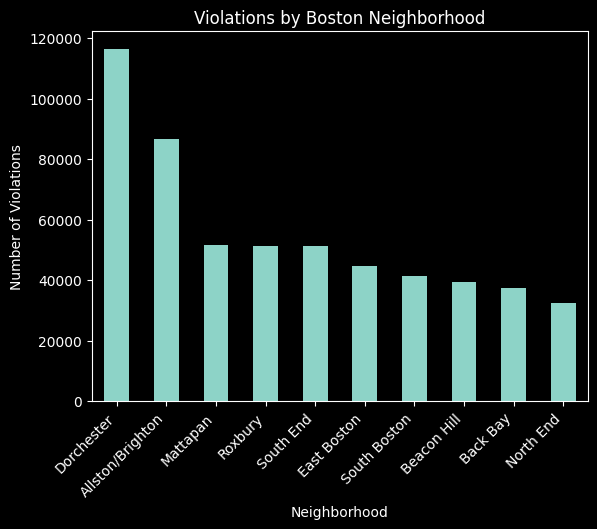

In [4]:

neighborhoods_df['Neighborhood'].value_counts().head(10).plot(kind='bar')

plt.xlabel('Neighborhood')
plt.ylabel('Number of Violations')
plt.title('Violations by Boston Neighborhood')
plt.xticks(rotation=45, ha="right")
plt.show()

### Q4 What kinds of building complaints are people making around the city?

In [25]:
# number of status
status_counts = data['status'].value_counts()

# distribution of violation types
description_counts = data['description'].value_counts()

# number of violation in each city
city_counts = data['contact_city'].value_counts()

# top 10 types of violation
top_10_violation_types = data['description'].value_counts().nlargest(10).index

data['description_revised'] = data['description'].apply(lambda x: x if x in top_10_violation_types else 'Other')

top_10_violation_counts_revised = data['description_revised'].value_counts()
top_10_violation_counts_revised

Improper storage trash: res       406634
Overfilling of barrel/dumpster     73832
Overgrown Weeds On Property        60236
Failure clear sidewalk - snow      39089
Improper storage trash: com        33939
Other                              23676
Illegal dumping < 1 cubic yd       19566
Occupying City prop wo permit       8784
illegal parking prop owner 1        6355
illegal parking prop owner 2        6353
Unregistered motor vehicles- 2      4799
Name: description_revised, dtype: int64

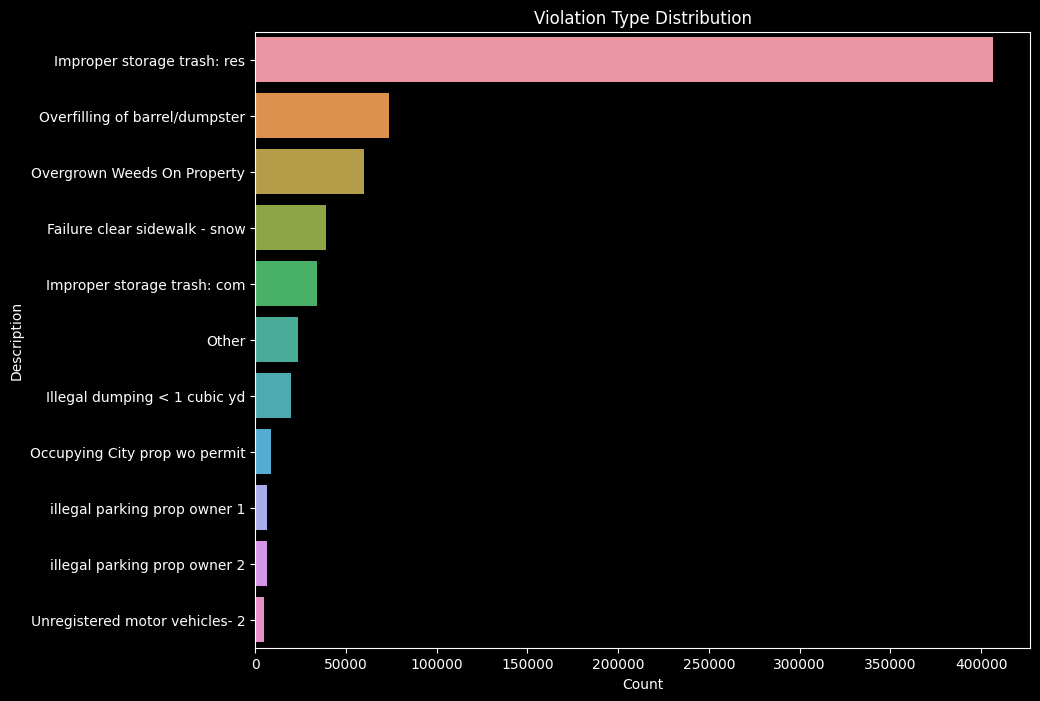

In [26]:

plt.figure(figsize=(10, 8))
sns.countplot(y='description_revised', data=data, order = data['description_revised'].value_counts().index)
plt.title('Violation Type Distribution')
plt.xlabel('Count')
plt.ylabel('Description')
plt.show()